# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/IMPORT/supply_chain_data.csv')
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

# **Checking Null Values**
## **As We Have No Null Values, so It Is Easy To Find Insights** 

In [4]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [19]:
 df['Product type'].value_counts()

skincare     40
haircare     34
cosmetics    26
Name: Product type, dtype: int64

# **Sales By Product Type**

In [22]:
product_sales=df.groupby('Product type')['Number of products sold'].sum().sort_values(ascending=True)

In [7]:
product_sales

Product type
cosmetics    11757
haircare     13611
skincare     20731
Name: Number of products sold, dtype: int64

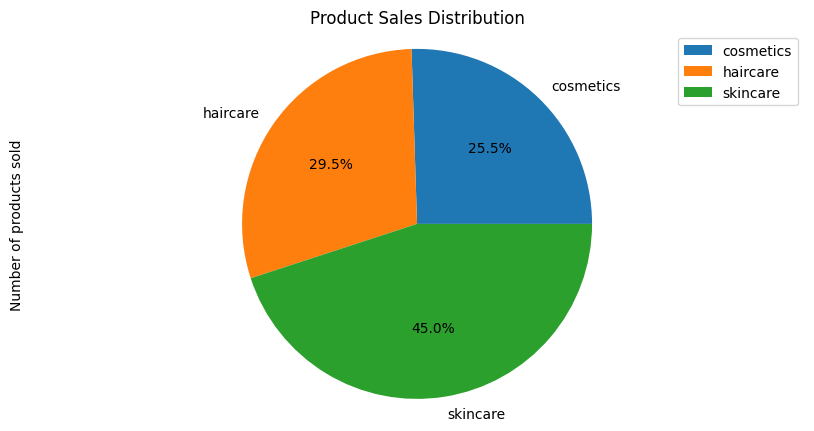

In [8]:
# Plotting the pie chart
product_sales.plot(kind='pie', autopct='%1.1f%%',figsize=(10,5))

# Adding labels and title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.title('Product Sales Distribution')

# Display the plot
plt.show()

# **Revenue Generated By Product Type**

In [9]:
revenue_generated=df.groupby('Product type')['Revenue generated'].sum().sort_values()

In [10]:
revenue_generated

Product type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: Revenue generated, dtype: float64

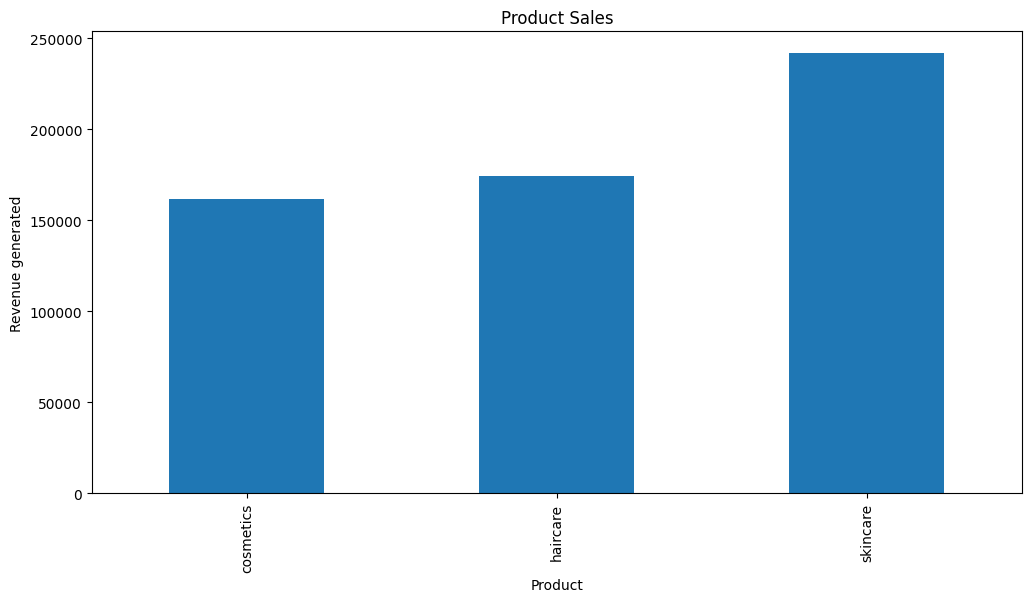

In [16]:
revenue_generated.plot(kind='bar',figsize=(12,6))

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Revenue generated')
plt.title('Product Sales')

# Display the plot
plt.show()

# **Total Revenue Generated By Shipping Carriers**

In [12]:
shipping_carriers=df.groupby('Shipping carriers')['Revenue generated'].sum().sort_values()

In [13]:
shipping_carriers

Shipping carriers
Carrier A    142629.994607
Carrier C    184880.177143
Carrier B    250094.646988
Name: Revenue generated, dtype: float64

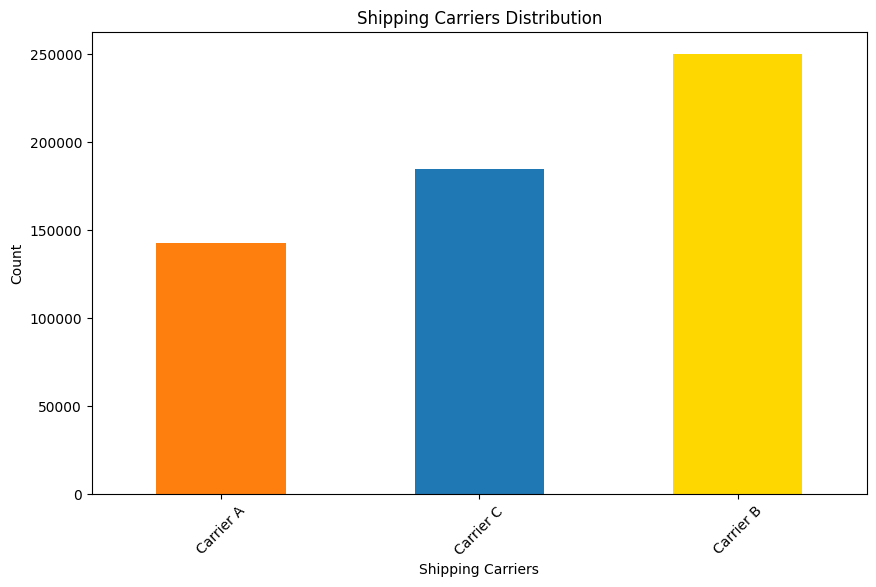

In [14]:
# Plotting the graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
colors = ['#FF7F0E', '#1F77B4', '#FFD700', '#2CA02C', '#D62728']  # Customize colors for each carrier

# Create the bar plot
shipping_carriers.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Shipping Carriers')
plt.ylabel('Count')
plt.title('Shipping Carriers Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()




# **Production Volumes In Different Products In Different Location**  

In [29]:
Volumes= df.groupby(['Product type', 'Location'])['Production volumes'].sum()
Volumes

Product type  Location 
cosmetics     Bangalore     974
              Chennai      2150
              Delhi        2799
              Kolkata      1443
              Mumbai       5095
haircare      Bangalore    4201
              Chennai      4521
              Delhi        3123
              Kolkata      4768
              Mumbai       3344
skincare      Bangalore    2652
              Chennai      5313
              Delhi        2440
              Kolkata      9240
              Mumbai       4721
Name: Production volumes, dtype: int64

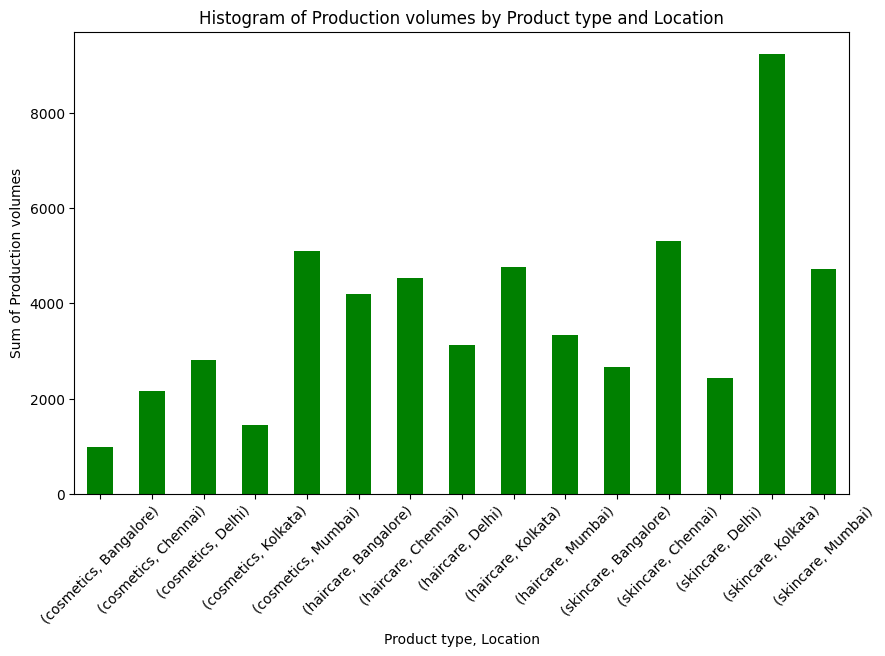

In [39]:
# Plotting the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
Volumes.plot(kind='bar', color='green')

# Set the labels and title of the plot
plt.xlabel('Product type, Location')
plt.ylabel('Sum of Production volumes')
plt.title('Histogram of Production volumes by Product type and Location')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

# **Conclusion**

## **In This Project We Have Taken A Supply Chain Dataset In Which We Have Generated Different Insights like Revenue Generated By Product Type , Volumes  Of Production In Different Products In Different Location , Total Revenue Generated By Shipping Carriers Etc .** 